In [1]:
import numpy as np 
import pandas as pd 
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_set1 = pd.read_csv("C:/Users/vineet/Desktop/Train_UWu5bXk.csv")
test_set =  pd.read_csv("C:/Users/vineet/Desktop/Test_u94Q5KV.csv")train_set1.shape


In [10]:

test.shape

(5681, 11)

In [11]:
train_set1.shape


(8523, 12)

In [12]:
train_set=pd.concat([train_set1,test_set])

train_set.describe()

C:\Users\vineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [13]:
train_set.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [15]:
train_set.isnull().sum()
for cols in train_set.columns:
    if (train_set[cols].dtype=='object'):
        print(train_set[cols].value_counts())


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
FDX26    10
NCF54    10
FDV38    10
DRH49    10
NCE19    10
FDY58    10
FDC14    10
FDT15    10
FDW47    10
FDB17    10
NCN41    10
DRA59    10
FDC35    10
FDP39    10
NCX18    10
NCL19    10
FDE34    10
DRD24    10
FDV21    10
FDB60    10
FDC22    10
DRD15    10
FDP11    10
FDQ08    10
NCF42    10
FDF22    10
FDY24    10
NCQ29    10
FDS13    10
FDJ20    10
         ..
FDU49     8
FDI14     8
FDU59     8
FDS43     8
FDP12     8
FDS16     8
FDS36     8
FDN33     8
FDJ04     8
FDY11     8
NCG55     8
FDJ16     8
FDR60     8
FDN22     8
FDV57     8
FDR25     8
FDB51     8
FDX49     7
FDM52     7
FDR51     7
DRN11     7
NCW54     7
FDL50     7
FDO33     7
FDM50     7
NCL42     7
FDS22     7
FDM10     7
FDI46     7
FDH58     7
Name: Item_Identifier, Length: 1559, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Food

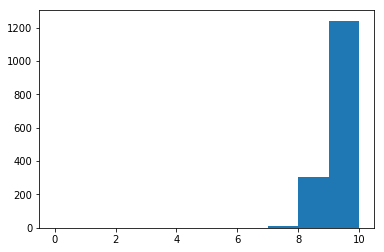

In [16]:
#Checking for the availability of items in outlets
item_count=train_set['Item_Identifier'].value_counts().sort_values()
plt.hist(item_count,bins=np.arange(0,11,1))
train_set['Item_Identifier'].describe()
plt.show()

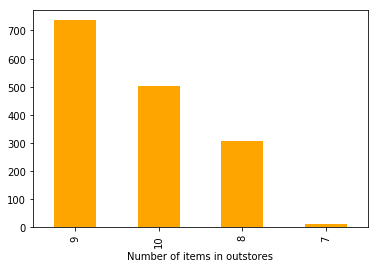

In [17]:
item_count_df=pd.DataFrame(item_count)
item_cnt=(item_count_df['Item_Identifier'].value_counts()/sum(item_count_df['Item_Identifier'])*100)
plt.xlabel('Number of items in outstores')
item_count_df['Item_Identifier'].value_counts().plot(kind='bar',color='orange')

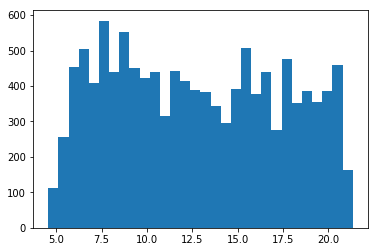

In [18]:
# Item Weight

# We can see "Item Weight" has missing values. From the distribution in data we can see that there are hikes 
# in between and even falls
train_set['Item_Weight'].describe()
train_wtou_null=train_set['Item_Weight'].dropna()
plt.hist(train_wtou_null,bins=30)
plt.show()

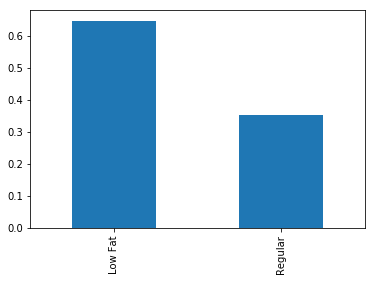

In [19]:
# Item_Fat_Content

# We can see the inconsistency in data, as there are only 2 unique categories as "Low Fat" and "Regular"
# We will need to convert "LF" and "low fat" into "Low Fat" and "reg" into "Regular"
# From the bar chart, we can see that about 65% of the items have low fat.
# That is people perfer purchasing low fat Item

train_set['Item_Fat_Content'].value_counts()
train_set.loc[train_set['Item_Fat_Content']=='LF','Item_Fat_Content']='Low Fat'
train_set.loc[train_set['Item_Fat_Content']=='low fat','Item_Fat_Content']='Low Fat'
train_set.loc[train_set['Item_Fat_Content']=='reg','Item_Fat_Content']='Regular'
content_cnt=pd.DataFrame(train_set.groupby(['Item_Identifier','Item_Fat_Content'])['Item_Fat_Content'].count())
content_cnt=content_cnt.rename(columns={'Item_Fat_Content':'Cnt'}).reset_index()
content_cnt['Item_Fat_Content'].value_counts()/sum(content_cnt['Item_Fat_Content'].value_counts())
(content_cnt['Item_Fat_Content'].value_counts()/sum(content_cnt['Item_Fat_Content'].value_counts())).plot(kind='bar')

0.1376453131 0.1632992342999999 0.2303851588199999


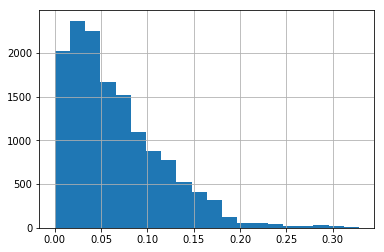

In [20]:
#Item Visibility
#we can see that most of the items have visibility less that 5%,There are few outliers and see that the distribution is rightskewed
#calculating the 95th and 99th percentiles,

b,c,d= np.percentile(train_set['Item_Visibility'],[90,95,99])
print(b,c,d)
train_set['Item_Visibility'].describe()
train_set['Item_Visibility'].hist(bins=20)

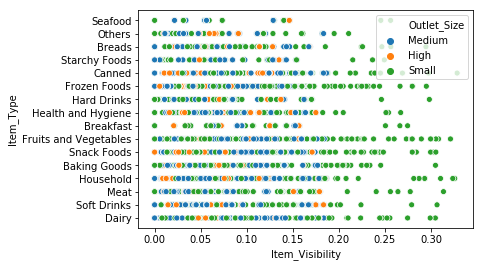

In [21]:
# If we from the below chart we can see that average visibility Small Outlet is more as compared to other outlet size 
train_set.groupby('Outlet_Size')['Item_Visibility'].mean()
sns.scatterplot(data=train_set,y='Item_Type',x='Item_Visibility',hue='Outlet_Size')

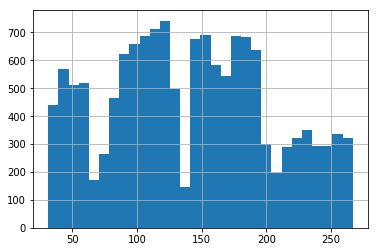

In [22]:
train_set['Item_MRP'].describe()
train_set['Item_MRP'].hist(bins=30)

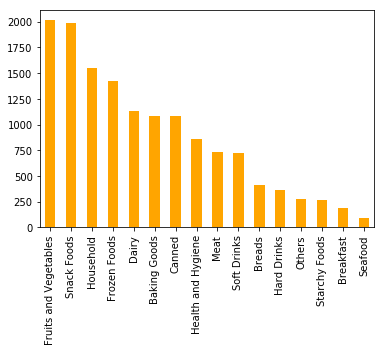

In [23]:
train_set['Item_Type'].value_counts().plot(kind='bar',color='orange')

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store        [OUT010]
OUT013             Supermarket Type1    [OUT013]
OUT017             Supermarket Type1    [OUT017]
OUT018             Supermarket Type2    [OUT018]
OUT019             Grocery Store        [OUT019]
OUT027             Supermarket Type3    [OUT027]
OUT035             Supermarket Type1    [OUT035]
OUT045             Supermarket Type1    [OUT045]
OUT046             Supermarket Type1    [OUT046]
OUT049             Supermarket Type1    [OUT049]
Name: Outlet_Identifier, dtype: object

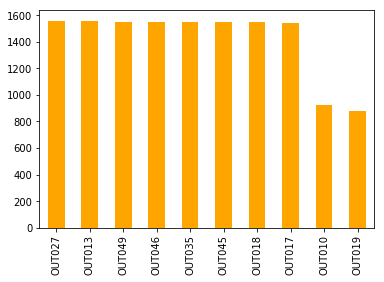

In [24]:
train_set['Outlet_Identifier'].value_counts().plot(kind='bar',color='orange')
#train_set.sort_values(by='Item_Identifier')
train_set.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Identifier'].unique()

In [25]:
train_set['Outlet_Establishment_Year']=train_set['Outlet_Establishment_Year'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y%'))
train_set['Year']=train_set['Outlet_Establishment_Year'].dt.year
train_set['Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Year, dtype: int64

In [26]:
train_set['Outlet_Size'].value_counts()
train_set['Outlet_Location_Type'].value_counts()
train_set['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [27]:
train_set.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Identifier'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Identifier, dtype: int64

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

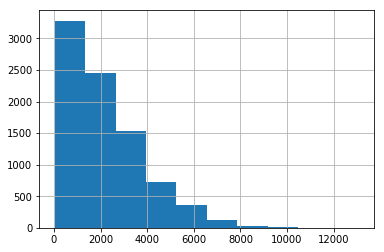

In [28]:
train_set['Item_Outlet_Sales'].hist()
train_set['Item_Outlet_Sales'].describe()

In [29]:
outlet_size_mode= train_set.pivot_table(values='Outlet_Size', columns = 'Outlet_Type',aggfunc=lambda x: x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [30]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
    
train_set['Outlet_Size'] = train_set[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)

In [31]:
item_wt=train_set.pivot_table(values='Item_Weight',columns='Item_Identifier',aggfunc='mean')

def itm_wt(cols):
    itm=cols[0]
    wt=cols[1]
    if(pd.isnull(wt)):
        return item_wt.loc['Item_Weight'][item_wt.columns== itm][0]
    else:
        return wt
    
train_set['Item_Weight']=train_set[['Item_Identifier','Item_Weight']].apply(itm_wt,axis=1)

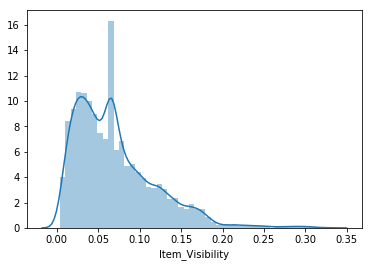

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Year                            0
dtype: int64

In [32]:
train_set.loc[train_set['Item_Visibility']==0.000000,'Item_Visibility']=np.mean(train_set['Item_Visibility'])
sns.distplot(train_set['Item_Visibility'],bins=50)
plt.show()

train_set.isnull().sum()

C:\Users\vineet\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.004264144352668997, pvalue=0.6113407255999421)

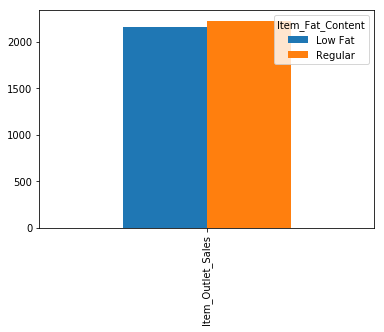

In [33]:
pd.pivot_table(data=train_set,columns='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc='mean').plot(kind='bar')
pd.pivot_table(data=train_set,columns='Item_Fat_Content',values='Item_MRP',aggfunc='mean')
train_set.groupby(['Item_Fat_Content'])['Item_Identifier'].count()
stats.spearmanr(train_set['Item_Fat_Content'],train_set['Item_MRP'])

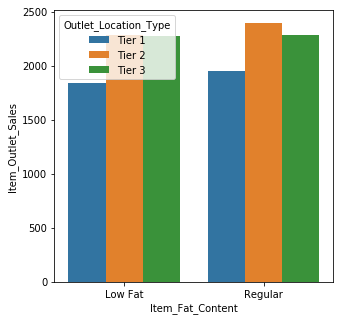

In [34]:
sales_loc=pd.pivot_table(data=train_set,index=['Item_Fat_Content','Outlet_Location_Type'],values='Item_Outlet_Sales',aggfunc='mean').reset_index()
sales_loc
plt.figure(figsize=(5,5))
sns.barplot(data=sales_loc,x='Item_Fat_Content',hue='Outlet_Location_Type',y='Item_Outlet_Sales')

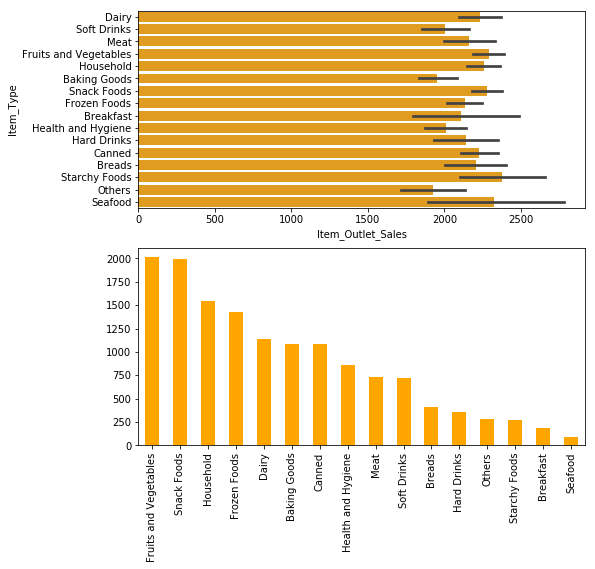

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
train_set['Item_Type'].value_counts().plot(kind='bar',color='orange')
pd.pivot_table(data=train_set,index='Item_Type',values=['Item_Outlet_Sales','Item_MRP'],aggfunc='mean')
plt.subplot(2,1,1)
sns.barplot(data=train_set,y='Item_Type',x='Item_Outlet_Sales',color='orange')

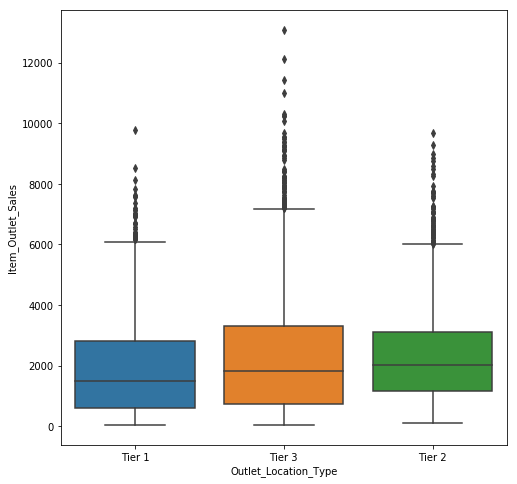

In [36]:
#if we see the average sales,tier 2,3 have more average sales as compared to other cities. It may be due to tier 2,tier 3 are moving to
#towards adopting new products, may be the products have more discounts and sales may increase
loc_sales=pd.pivot_table(data=train_set,index=['Outlet_Location_Type'],values='Item_Outlet_Sales',aggfunc='mean').reset_index()
loc_sales
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=train_set)
#sns.boxplot(data=loc_sales,x='Item_Outlet_Sales',hue='Outlet_Location_Type')

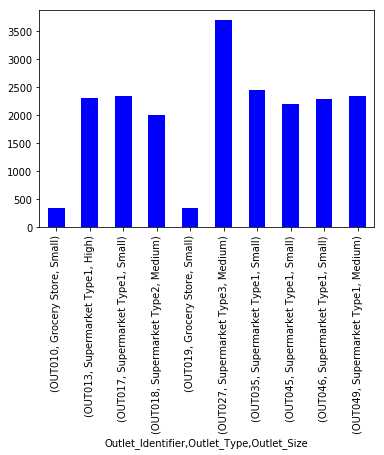

In [37]:
train_set.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean().plot(kind='bar',color='blue')
#outlet size doesnt make more difference in the sales, if we compare the sales outlet type wise, then Supermarket Type1 with 
#size : [Small,Medium,high] shows almost same average sales. 

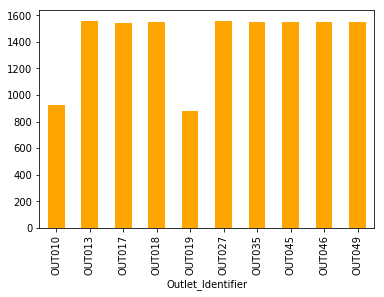

In [38]:
#As the OUT010 and OUT019 are small grocery store,the number of items available are less as compared to othe stores 
#therefore tha average sales of this outlets is less
train_set.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type'])['Item_Identifier',].count()
train_set.groupby(['Outlet_Identifier'])['Item_Identifier'].count().plot(kind='bar',color='orange')

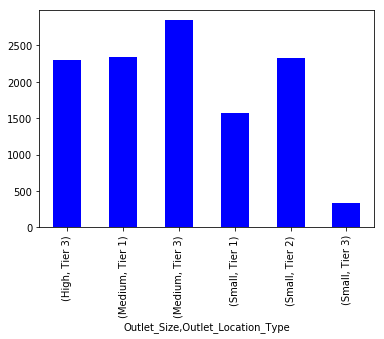

In [39]:
# if we see that average sales for the item, it's pretty high in Tier 3 city, this can be due to people from this cities
#moving to desire and try on new products that are available in supermarket of Tier 1 cities
train_set.groupby(['Outlet_Size','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot(kind='bar',color='blue')

<Figure size 1080x1080 with 0 Axes>

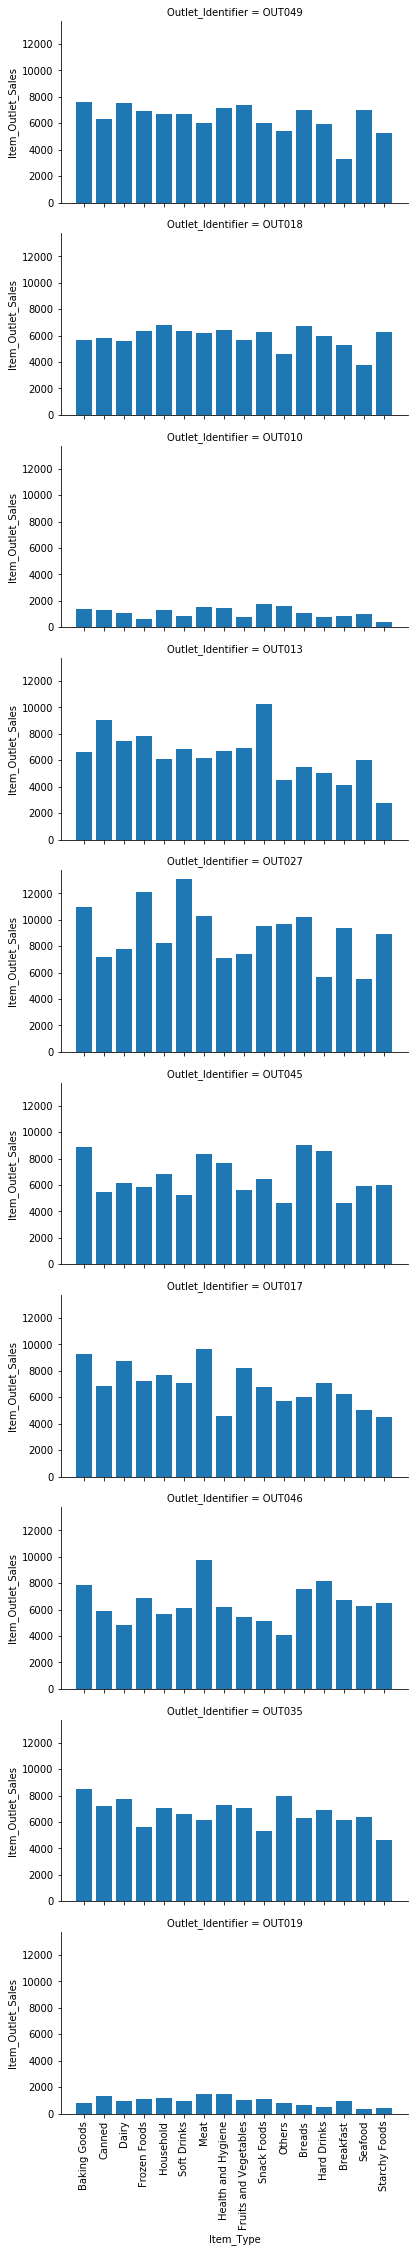

In [40]:
ItemType_sales=pd.pivot_table(data=train_set,index=['Item_Type','Outlet_Identifier'],values='Item_Outlet_Sales',aggfunc='mean').reset_index()
plt.figure(figsize=(15,15))
g=sns.FacetGrid(data=train_set,row='Outlet_Identifier',aspect=2)
g=g.map(plt.bar,'Item_Type','Item_Outlet_Sales')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

In [43]:
def create_Category(data):
    if str(data['Item_Identifier']).startswith('NC'):
        return 'Non Consumable'
    elif str(data['Item_Identifier']).startswith('FD'):
        return 'Food'
    else:
        return 'Drinks'
    #train_set['check1']= train_set['Item_Identifier'].apply(lambda x: x[0:2])
train_set['Item_Category']= train_set.apply(create_Category,axis=1)

train_set['Item_Category'].value_counts()

Food              10201
Non Consumable     2686
Drinks             1317
Name: Item_Category, dtype: int64

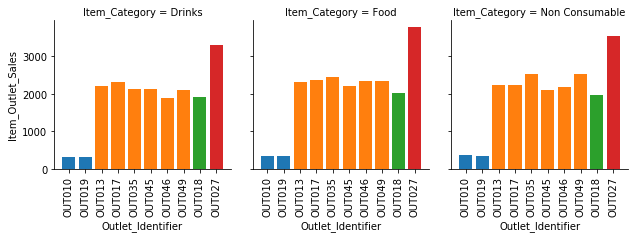

In [44]:
cat_sales=pd.pivot_table(data=train_set,index=['Item_Category','Outlet_Identifier','Outlet_Type'],values='Item_Outlet_Sales',aggfunc='mean').reset_index()
g=sns.FacetGrid(data=cat_sales,col='Item_Category',hue='Outlet_Type',legend_out=True)
g=g.map(plt.bar,'Outlet_Identifier','Item_Outlet_Sales')

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

In [45]:
# After  dividing the items in to item category, we can find that category "Non consumable" will have no fats hence 
# adding a level to Item_Fat_Content as "No Fats" 

train_set.loc[train_set['Item_Category']=='Non Consumable','Item_Fat_Content']='No Fat'
train_set['Item_Fat_Content'].value_counts()

Low Fat    6499
Regular    5019
No Fat     2686
Name: Item_Fat_Content, dtype: int64

(array([  43.,  207.,  501., 1100., 1840., 2509., 3801., 2624., 1364.,
         215.]),
 array([-2.44676064, -2.25044546, -2.05413028, -1.8578151 , -1.66149991,
        -1.46518473, -1.26886955, -1.07255437, -0.87623919, -0.679924  ,
        -0.48360882]),
 <a list of 10 Patch objects>)

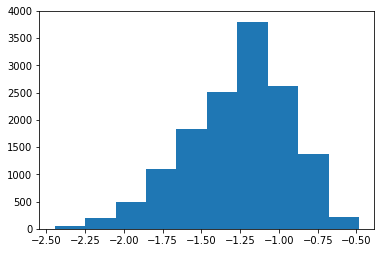

In [46]:
train_set['Visibility_log']=np.log10(train_set['Item_Visibility'])
plt.hist(train_set['Visibility_log'])

In [47]:
train_set=pd.get_dummies(train_set,columns=['Item_Fat_Content'])
#train_set=pd.concat([train_set,train_fat_content])

In [48]:
train_set=pd.get_dummies(train_set,columns=['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Category'])

In [49]:
list1=['Item_MRP','Item_Visibility', 'Item_Weight',
       'Year', 'Visibility_log', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_No Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Category_Drinks',
       'Item_Category_Food', 'Item_Category_Non Consumable','Item_Outlet_Sales']
train_set=train_set[list1]

In [50]:
#dividing the train_set into training and test set
train=train_set.loc[train_set['Item_Outlet_Sales'] > 0]
test=train_set.loc[train_set['Item_Outlet_Sales'].isnull()]

test.shape

(5681, 48)

In [51]:
train.shape

(8523, 48)

In [52]:
train.head(2)
test.head(2)

,Item_MRP,Item_Visibility,Item_Weight,Year,Visibility_log,Item_Fat_Content_Low Fat,Item_Fat_Content_No Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drinks,Item_Category_Food,Item_Category_Non Consumable,Item_Outlet_Sales
0,107.8622,0.007565,20.75,1999,-2.121200,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,NaN
1,87.3198,0.038428,8.30,2007,-1.415356,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,NaN


In [53]:
del test['Item_Outlet_Sales']

In [54]:
train.shape

(8523, 48)

In [55]:
test.shape

(5681, 47)

In [56]:
#preparing the Validation data 
X_train=train.iloc[:, :-1]
Y_train=train.iloc[:,-1]
test.shape

(5681, 47)

In [57]:
from sklearn.linear_model import LinearRegression

regresor= LinearRegression()
regresor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
y_pred=regresor.predict(test)
y_pred1=pd.DataFrame(y_pred)
y_pred1.to_csv('pred', sep='\t', encoding='utf-8')